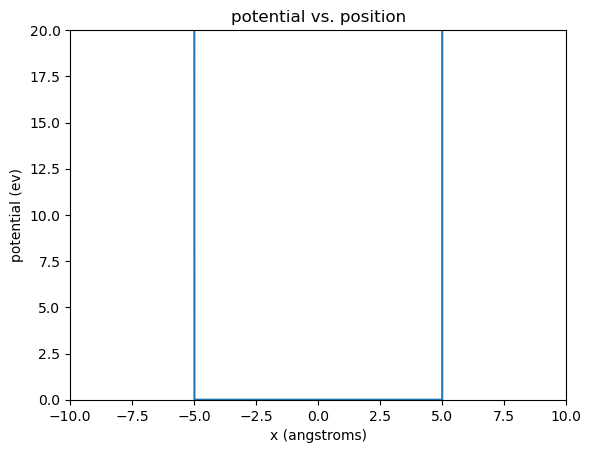

-1.3459929671461588
-1.4399708598071868


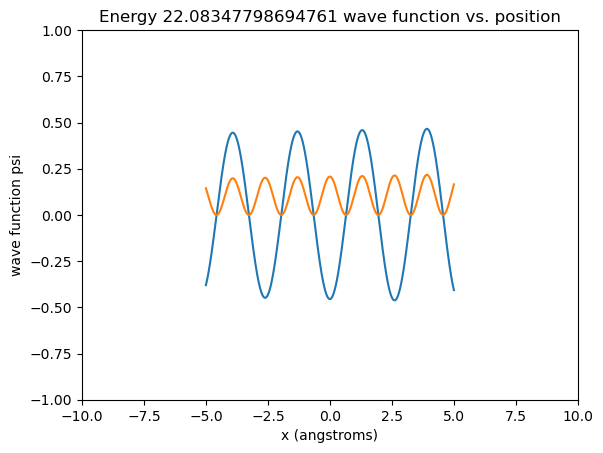

In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  3 15:04:15 2019

@author: Dviolette, Jterry
"""

import sys 
stdout =sys.stdout


sys.stdout = stdout 
import numpy as np
import matplotlib.pyplot as plt
import math as math


%matplotlib inline

#adjust these values to find the eigenvalues of the infinite square well

testEnergy = 22

#adjust this value to change the starting guess of the slope of the wavefunction in the shooting method
slopeGuess = 2.0

#adjust these valuesa to change the size of the box
with_of_box = 10
halfBox = with_of_box/2

#adjust mass of particle
#m = 1/206.768  #mass of a Muon in relation to an electron under one
m = 1.0/1.0 #mass of the electron

potentialBox = 100

ħ2overme = 7.62 # planks constant squared over the mass of an electron on an electron units are electron volts angstrums squared

alpha = math.sqrt((2 * m * (potentialBox - testEnergy)))/math.sqrt(ħ2overme)

x_steps = 5000
yi=0
vi=0

#use this to change the size of the graph of the wavefunctions 
y_min=-1
y_max=1
x_min=-halfBox-5
x_max=halfBox+5

# Defines the 1D arrays to be used in the computation and # sets all values in the arrays to zero
psi_prime = np.zeros(x_steps)
psi = np.zeros(x_steps)
v_x = np.zeros(x_steps)
tIExp = np.zeros(500)
tIX = np.linspace(x_min,-halfBox,500)

psi_endofbox=0.0
epslion=.0000001
Earray=[]


#functions used to shorten code  
def plots(X_value,Y_value,Y_min,Y_max,X_min,X_max,Yname,Xname,title):
    plt.plot(X_value, Y_value )
    plt.ylim((Y_min,Y_max))
    plt.xlim((X_min,X_max))
    plt.ylabel(Yname)
    plt.xlabel(Xname)
    plt.title(title)
    
def Eulers_method(B): 
    
    #Implement the shooting method
    #
    #
    #     Yi+1 = Yi + Y'i*Δx                      
    #     Y'i+1 = Y'i + Δx * 2*m*(V-E)                           
    #                        _________  Yi                     
    #                               2                            
    #                          hbar      

    #define useful varibles
    kBar = math.sqrt((2*m*B)/(ħ2overme))
    alpha = math.sqrt((2 * m * (potentialBox - B)))/math.sqrt(ħ2overme)
    boundValue = kBar/alpha - alpha/kBar
        
    psi[0]=boundValue
    psi_prime[0]=slopeGuess
    i=1
    while i < len(xpoints):
        Δx = xpoints[i]-xpoints[i-1]
        psi[i]=psi[i-1]+Δx*psi_prime[i-1]
        psi_double_prime=m*2.0/ħ2overme*(v_x[i-1]-B)*psi[i-1]
        psi_prime[i]=psi_prime[i-1]+Δx*psi_double_prime
        i=i+1

    return boundValue
 

#Set up the x axis points within the 1D Box and
#Populate the Potential Energy of the Infinite Square Well
i=0
xpoints = np.linspace(-halfBox, halfBox, x_steps)
while i < len(v_x):
    if i==0 :
        v_x[i] = potentialBox
    if i==len(v_x)-1:
        v_x[i] = potentialBox

    i=i+1
     
# Plotting Results
plots(xpoints,v_x,0,20,x_min,x_max,'potential (ev)','x (angstroms)','potential vs. position')
plt.show()

eigenEnergy = [0] * 100
q=0

while q < len(eigenEnergy):
    kBar = math.sqrt((2*m*q)/math.sqrt(ħ2overme))
    v = (kBar*with_of_box)/2


    eigenEnergy[q] = (2*ħ2overme * v ** 2)/(m*with_of_box**2)
    
    if(testEnergy < eigenEnergy[q]):
        if(abs(eigenEnergy[q] - testEnergy) >= abs(eigenEnergy[q-1] - testEnergy)):
            testEnergy = eigenEnergy[q-1]
            break
        else:
            testEnergy = eigenEnergy[q]   
            break
    q = q + 1
    

boundValue =Eulers_method(testEnergy)
    
print(boundValue)
print((psi[len(psi)-1]))    

#Calculate the area under the probability curve Y*Ydx 
psistarpsi=psi*psi
total=sum(psistarpsi)
mean=total/(x_steps)
integral=mean*with_of_box
psistarpsi=psistarpsi/integral
psi=psi/np.sqrt(integral)


plots(xpoints,psi,y_min,y_max,x_min,x_max,'wave function psi','x (angstroms)','Energy '+ str(testEnergy)+ ' wave function vs. position')
plots(xpoints,psistarpsi,y_min,y_max,x_min,x_max,'wave function psi','x (angstroms)','Energy '+ str(testEnergy)+ ' wave function vs. position')
plt.show()
